In [1]:
import Pkg; Pkg.add("ModelingToolkit"); Pkg.add("OrdinaryDiffEq")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


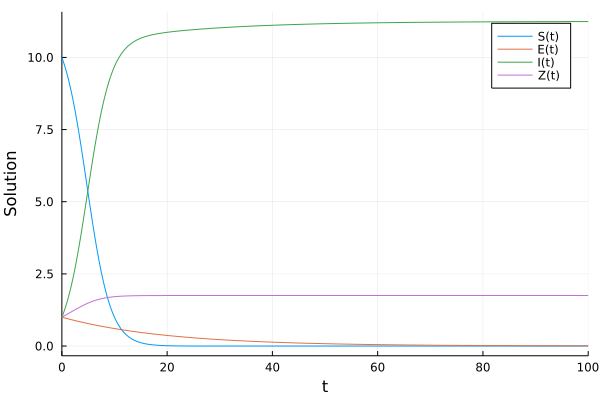

In [12]:
using ModelingToolkit, OrdinaryDiffEq, Plots

@parameters t 𝜀 ρ β b p l N
@variables S(t) E(t) I(t) Z(t)
D = Differential(t)

eqs = [D(S) ~ -β*S*(I/N) - b*S*(Z/N),
       D(E) ~ (1-p)*β*S*(I/N) + (1-l)*β*S*(Z/N) - ρ*E*(l/N) - 𝜀*E,
       D(I) ~ p*β*S*(I/N) + ρ*E*(I/N) + 𝜀*E,
       D(Z) ~ l*b*S*(Z/N)]

@named sys = ODESystem(eqs)
sys = ode_order_lowering(sys)

u0 = [S => 10,
      E => 1,
      I => 1,
      Z => 1]

p  = [𝜀 => 0.05,
      ρ => 1e-06,
      β => 4,
      b => 1,
      p => 1,
      l => 1,
      N => 100]

tspan = (0,100)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())

plot(sol,vars=(t,S), label = "S(t)",); 
plot!(sol,vars=(t,E),label = "E(t)"); 
plot!(sol,vars=(t,I),label = "I(t)"); 
plot!(sol,vars=(t,Z), label = "Z(t)", ylabel = "Solution")